# Step 0 - Lib Imports

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn as skl
import uuid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IBM-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Step 1 - Parsed table

In [3]:
new_df = pd.DataFrame(columns=[ 'Age', 'Gender', 'Attrition', 'Hourly_rate'])

# Age
new_df['Age'] = np.where((18 <= df['Age'])&(df['Age'] <=25), 0,  
                                np.where((26 <= df['Age'])&(df['Age'] <=35), 1, 
                                         np.where((36 <= df['Age'])&(df['Age'] <=45), 2, 
                                                  np.where((46 <= df['Age'])&(df['Age'] <=55), 3, 
                                                           np.where(55 < df['Age'], 4, df['Age'])))))

# HourlyRate 
new_df['Hourly_rate'] = np.where((30 <= df['HourlyRate'])&(df['HourlyRate'] <= 50), 0,  
                                    np.where((51 <= df['HourlyRate'])&(df['HourlyRate'] <= 70), 1, 
                                         np.where((71 <= df['HourlyRate'])&(df['HourlyRate'] <= 90), 2, 
                                                  np.where(91 <= df['HourlyRate'], 3, df['HourlyRate']))))
# Gender
new_df['Gender'] = np.where(df['Gender'] == 'Female', 0, 1)

# Attrition
new_df['Attrition'] = np.where(df['Attrition'] == 'No', 0, 1)

# generate unique ids
ids = [uuid.uuid4() for _ in range(len(new_df))]
# add ids as a new column to the dataframe
new_df['ID'] = ids

print("length of new_Df", len(new_df))
new_df.head()

length of new_Df 1470


,Age,Gender,Attrition,Hourly_rate,ID
0,2,0,1,3,134f8d11-70bc-4876-bfa4-96f806ba5a05
1,3,1,0,1,2e9646f2-80cb-4712-9bc8-326de87fa442
2,2,1,1,3,3d05127d-efb7-4ec0-85e2-1d625e644463
3,1,0,0,1,165fba04-eedd-45be-83f6-8f0fa59e0864
4,1,1,0,0,47757ea9-5840-45cd-bfbc-f6c4f8d51765


# Step 2 - Count Frequency

Frequency Table for Age vs. Attrition:             ID     
Attrition    0    1
Age                
0           79   44
1          490  116
2          425   43
3          200   26
4           39    8


Text(0, 0.5, 'Count')

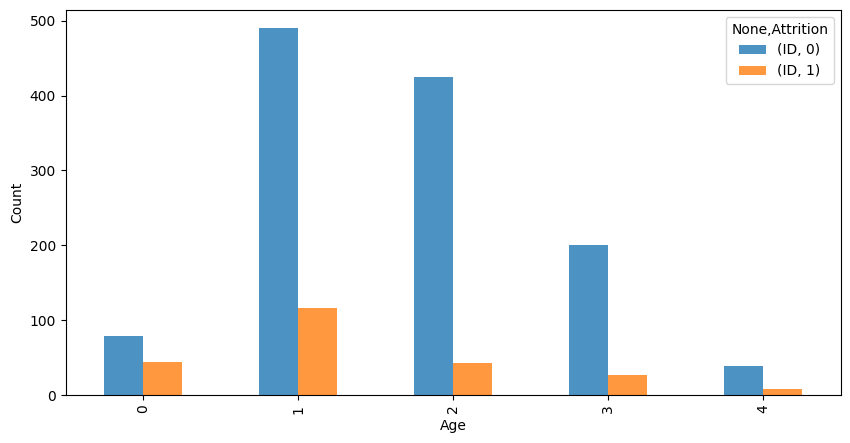

In [4]:
# create a pivot table for Age vs. Attrition
pivot_table_AgeAttrition = pd.pivot_table(new_df, values=['ID'], index=['Age'], columns=['Attrition'], aggfunc='count')
print("Frequency Table for Age vs. Attrition:", pivot_table_AgeAttrition)
ax_AgeAttrition = pivot_table_AgeAttrition.plot(kind='bar', figsize=(10, 5), alpha=0.8)
ax_AgeAttrition.set_ylabel('Count')

Frequency Table for Age vs. Hourly Rate:               ID              
Hourly_rate    0    1    2   3
Age                           
0             36   39   25  23
1            179  164  180  83
2            126  125  146  71
3             60   64   67  35
4              8   16   16   7


Text(0, 0.5, 'Count')

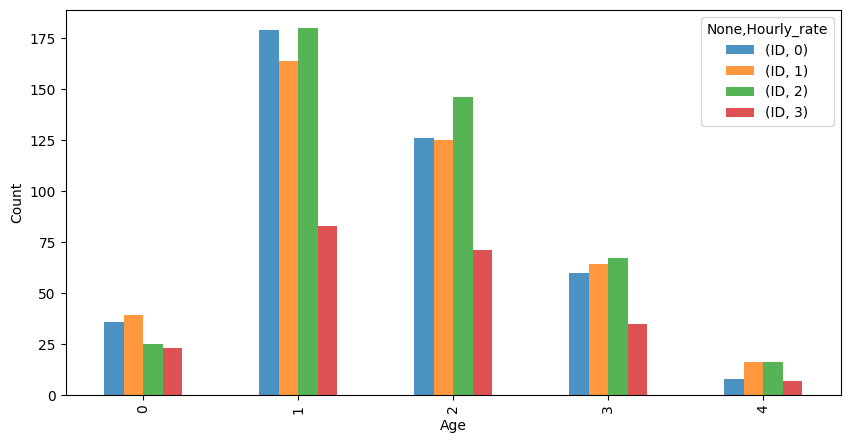

In [5]:
# create a pivot table for Age vs. Hourly Rate
pivot_table_AgeHourlyRate = pd.pivot_table(new_df, values=['ID'], index=['Age'], columns=['Hourly_rate'], aggfunc='count')
print("Frequency Table for Age vs. Hourly Rate:", pivot_table_AgeHourlyRate)
ax_AgeHourlyRate = pivot_table_AgeHourlyRate.plot(kind='bar', figsize=(10, 5), alpha=0.8)
ax_AgeHourlyRate.set_ylabel('Count')

Frequency Table for Sex vs. Attrition:             ID     
Attrition    0    1
Gender             
0          501   87
1          732  150


Text(0, 0.5, 'Count')

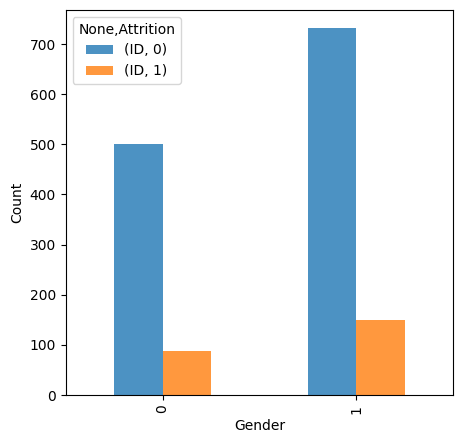

In [6]:
# create a pivot table for Sex vs. Attrition:
pivot_table_SexAttrition = pd.pivot_table(new_df, values=['ID'], index=['Gender'], columns=['Attrition'], aggfunc='count')
print("Frequency Table for Sex vs. Attrition:", pivot_table_SexAttrition)
ax_SexAttrition = pivot_table_SexAttrition.plot(kind='bar', figsize=(5, 5), alpha=0.8)
ax_SexAttrition.set_ylabel('Count')

Frequency Table for Sex vs. Hourly Rate:                ID               
Hourly_rate    0    1    2    3
Gender                         
0            163  158  175   92
1            246  250  259  127


Text(0, 0.5, 'Count')

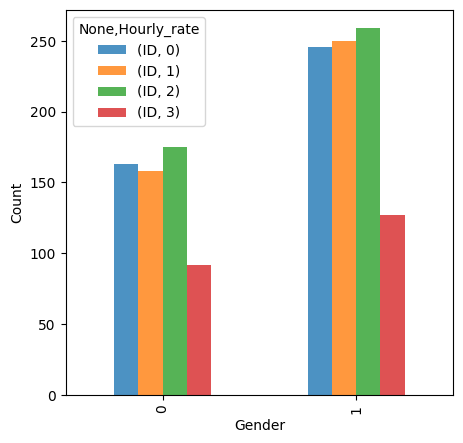

In [7]:
# create a pivot table for Sex vs. Hourly Rate
pivot_table_SexHourlyRate = pd.pivot_table(new_df, values=['ID'], index=['Gender'], columns=['Hourly_rate'], aggfunc='count')
print("Frequency Table for Sex vs. Hourly Rate: ", pivot_table_SexHourlyRate)
ax_SexHourlyRate = pivot_table_SexHourlyRate.plot(kind='bar', figsize=(5, 5), alpha=0.8)
ax_SexHourlyRate.set_ylabel('Count')

# Step 3 - Fairness and Bias Analysis

In [8]:
print("Original dataframe:", new_df.head())

# Identify the protected class: age 18-25
protected = new_df[(new_df['Age'] == 0)]
unprotected = new_df[(new_df['Age'] != 0)]

# Identify the protected class for sex: 0
protected_sex = new_df[(new_df['Gender'] == 1)]
unprotected_sex = new_df[(new_df['Gender'] != 1)]

Original dataframe:    Age  Gender  Attrition  Hourly_rate                                    ID
0    2       0          1            3  134f8d11-70bc-4876-bfa4-96f806ba5a05
1    3       1          0            1  2e9646f2-80cb-4712-9bc8-326de87fa442
2    2       1          1            3  3d05127d-efb7-4ec0-85e2-1d625e644463
3    1       0          0            1  165fba04-eedd-45be-83f6-8f0fa59e0864
4    1       1          0            0  47757ea9-5840-45cd-bfbc-f6c4f8d51765


## DI and SPD for original dataset

In [9]:
print("Age vs. Attrition:")
DisparateImpact_AgeAttrition = new_df.loc[protected.index, 'Attrition'].mean() / new_df.loc[unprotected.index, 'Attrition'].mean()
StatisticalParityDifference_AgeAttrition = new_df.loc[protected.index, 'Attrition'].mean() - new_df.loc[unprotected.index, 'Attrition'].mean()

print("DisparateImpact_AgeAttrition", DisparateImpact_AgeAttrition)
print("StatisticalParityDifference_AgeAttrition", StatisticalParityDifference_AgeAttrition)

Age vs. Attrition:
DisparateImpact_AgeAttrition 2.4966510805004427
StatisticalParityDifference_AgeAttrition 0.21444221123725715


In [10]:
print("Age vs. HourlyRate: ")
DisparateImpact_AgeHourlyRate = new_df.loc[protected.index, 'Hourly_rate'].mean() / new_df.loc[unprotected.index, 'Hourly_rate'].mean()
StatisticalParityDifference_AgeHourlyRate = new_df.loc[protected.index, 'Hourly_rate'].mean() - new_df.loc[unprotected.index, 'Hourly_rate'].mean()

print("DisparateImpact_AgeHourlyRate", DisparateImpact_AgeHourlyRate)
print("StatisticalParityDifference_AgeHourlyRate", StatisticalParityDifference_AgeHourlyRate)

Age vs. HourlyRate: 
DisparateImpact_AgeHourlyRate 0.9748127791137067
StatisticalParityDifference_AgeHourlyRate -0.033190287359443627


In [11]:
print("Sex vs. Attrition: ")
DisparateImpact_SexAttrition = new_df.loc[protected_sex.index, 'Attrition'].mean() / new_df.loc[unprotected_sex.index, 'Attrition'].mean()
StatisticalParityDifference_SexAttrition = new_df.loc[protected_sex.index, 'Attrition'].mean() - new_df.loc[unprotected_sex.index, 'Attrition'].mean()

print("DisparateImpact_SexAttrition", DisparateImpact_SexAttrition)
print("StatisticalParityDifference_SexAttrition", StatisticalParityDifference_SexAttrition)

Sex vs. Attrition: 
DisparateImpact_SexAttrition 1.1494252873563218
StatisticalParityDifference_SexAttrition 0.022108843537414963


In [12]:
print("Sex vs. HourlyRate: ")
DisparateImpact_SexHourlyRate = new_df.loc[protected_sex.index, 'Hourly_rate'].mean() / new_df.loc[unprotected_sex.index, 'Hourly_rate'].mean()
StatisticalParityDifference_SexHourlyRate = new_df.loc[protected_sex.index, 'Hourly_rate'].mean() - new_df.loc[unprotected_sex.index, 'Hourly_rate'].mean()

print("DisparateImpact_SexHourlyRate", DisparateImpact_SexHourlyRate)
print("StatisticalParityDifference_SexHourlyRate", StatisticalParityDifference_SexHourlyRate)

Sex vs. HourlyRate: 
DisparateImpact_SexHourlyRate 0.9770408163265306
StatisticalParityDifference_SexHourlyRate -0.030612244897959107


## Customized Reweighting Algorithms

In [30]:
orig_dataset = new_df.copy()

# Calculate the weights based on an inverse
unprotected_prob = orig_dataset.loc[unprotected.index, 'Attrition'].mean()
protected_prob = orig_dataset.loc[protected.index, 'Attrition'].mean()

orig_dataset.loc[unprotected.index, 'Weight'] = 1 / unprotected_prob
orig_dataset.loc[protected.index, 'Weight'] = 1 / protected_prob

# Come up with the transformed dataset
transformed_df_3 = orig_dataset.copy()
transformed_df_3['Attrition'] = transformed_df_3['Attrition'] * transformed_df_3['Weight'] 

# Calculate the sample weights based on inverse likelihood
unprotected_prob_t = transformed_df_3.loc[unprotected.index, 'Attrition'].mean()
protected_prob_t = transformed_df_3.loc[protected.index, 'Attrition'].mean()

print("unprotected_prob_t", unprotected_prob_t)
print("protected_prob_t", protected_prob_t)

unprotected_prob_t 1.0000000000000004
protected_prob_t 1.0


In [14]:
print("Transformed dataframe for Step 3:", transformed_df_3.head())

Transformed dataframe for Step 3:    Age  Gender  Attrition  Hourly_rate                                    ID  \
0    2       0   6.979275            3  134f8d11-70bc-4876-bfa4-96f806ba5a05   
1    3       1   0.000000            1  2e9646f2-80cb-4712-9bc8-326de87fa442   
2    2       1   6.979275            3  3d05127d-efb7-4ec0-85e2-1d625e644463   
3    1       0   0.000000            1  165fba04-eedd-45be-83f6-8f0fa59e0864   
4    1       1   0.000000            0  47757ea9-5840-45cd-bfbc-f6c4f8d51765   

     Weight  
0  6.979275  
1  6.979275  
2  6.979275  
3  6.979275  
4  6.979275  


In [15]:
DisparateImpact_AgeAttrition_t3 = protected_prob_t / unprotected_prob_t
StatisticalParityDifference_AgeAttrition_t3 = protected_prob_t - unprotected_prob_t

print("DisparateImpact_AgeAttrition_t3", DisparateImpact_AgeAttrition_t3)
print("StatisticalParityDifference_AgeAttrition_t3", StatisticalParityDifference_AgeAttrition_t3)

DisparateImpact_AgeAttrition_t3 0.9999999999999996
StatisticalParityDifference_AgeAttrition_t3 -4.440892098500626e-16


# Step 4

In [25]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(new_df, test_size=0.5, random_state=42)
# Print the shapes of the resulting train and test sets to verify that the split was successful
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (735, 5)
Test set shape: (735, 5)


In [28]:
# Calculate the original di
original_di = test_df[test_df['Age'] == 0]['Attrition'].mean() / test_df[test_df['Age'] != 0]['Attrition'].mean()
# Calculate the original spd
original_spd = test_df[test_df['Age'] == 0]['Attrition'].mean() - test_df[test_df['Age'] != 0]['Attrition'].mean()

print("Original DI:", original_di)
print("Original SPD:", original_spd)

Original DI: 3.1272893772893773
Original SPD: 0.2616285617749747


## Transformation of the dataset

In [18]:
from sklearn.utils import resample

# Copy new_df to transformed_df_3
transformed_df_4 = new_df.copy()

# Identify the privileged age group
privileged_df = transformed_df_4.loc[protected.index]
print("privileged_df", len(privileged_df))
# Identify the unprivileged age group
unprivileged_df = transformed_df_4.loc[unprotected.index]
print("unprivileged_df", len(unprivileged_df))

# Create another df using the original privileged_df which has
# 1. random duplicates of the original privileged_df to be included;
# 2. the size of oversampled_privileged_df = len(unprivileged_df) - len(privileged_df)
oversampled_privileged_df = resample(privileged_df, 
                                     replace = True, 
                                     n_samples = unprivileged_df.shape[0] - len(privileged_df), 
                                     random_state = 3)

# Assigned the Attrition values to 0 in the oversampled_privileged_df
# to not introduce more YESs (1)
oversampled_privileged_df['Attrition'] = 0

# cancat oversampled_privileged_df, unprivileged_df, privileged_df
# to create a balanced df and finish the transformation
transformed_df_4 = pd.concat([oversampled_privileged_df, unprivileged_df, privileged_df])

print("df_balanced", transformed_df_4.head())

privileged_df 123
unprivileged_df 1347
df_balanced       Age  Gender  Attrition  Hourly_rate  \
1217    0       1          0            1   
345     0       1          0            2   
1436    0       1          0            1   
34      0       1          0            1   
638     0       1          0            2   

                                        ID  
1217  b598f937-506f-4402-98b0-290ad1b5162d  
345   74c94598-3208-4b17-bb89-a6f1ac4190af  
1436  0400c935-c051-40c6-887e-6ea94c1d565f  
34    4dc252ad-20fc-4b18-9c75-e663a4d564f2  
638   a998c9c6-d68d-4189-b563-92c3ac3de045  


In [19]:
# Split the transformed dataset into training and testing sets
train_df_t, test_df_t = train_test_split(transformed_df_4, test_size=0.5, random_state=3)
# Print the shapes of the resulting train and test sets to verify that the split was successful
print("Transformed Train set shape:", train_df_t.shape)
print("Transformed Test set shape:", test_df_t.shape)

Transformed Train set shape: (1347, 5)
Transformed Test set shape: (1347, 5)


In [29]:
print("Age vs. Attrition for transformed testing:")
# Calculate the transformed di
transformed_di = test_df_t[test_df_t['Age'] == 0]['Attrition'].mean() / test_df_t[test_df_t['Age'] != 0]['Attrition'].mean()
# Calculate the transformed spd
transformed_spd = test_df_t[test_df_t['Age'] == 0]['Attrition'].mean() - test_df_t[test_df_t['Age'] != 0]['Attrition'].mean()

print("Transformed DI:", transformed_di)
print("Transformed SPD:", transformed_spd)

Age vs. Attrition for transformed testing:
Transformed DI: 0.19944454904914327
Transformed SPD: -0.11248462240565102
